Back to the main [Index](../index.ipynb)

### Simulating Models

Antimony models can be converted into a `RoadRunner` instance, which can be used to simulate the model. The function `loada` converts Antimony into a simulator instance. This example shows how to get the Antimony / SBML representation of the current state of the model. After running a simulation, the concentraions of the state variables will change. You can retrieve the Antimony representation of the current state of the model using `getCurrentAntimony` on the `RoadRunner` instance. This example shows the change in the Antimony / SBML representation. The example also shows how to use variable stepping in a simulation.

--------------------------------------------------------------------------------
tellurium : 2.0.0
roadrunner : 1.4.21; Compiler: gcc 4.8.2, C++ version: 199711; JIT Compiler: LLVM-3.3; Date: Jul  5 2017, 18:38:02; LibSBML Version: 5.14.0
antimony : 2.9.3
libsbml : 5.15.0
libsedml : 402
phrasedml : 1.0.7
--------------------------------------------------------------------------------
Comparing Antimony at time 0 & 40 (expect no differences)

Comparing Antimony at time 0 & 15
--- before.sb

+++ after.sb

@@ -6,7 +6,7 @@

   _E1: at time >= 20: p1 = 0;
 
   // Variable initializations:
-  p1 = 0;
+  p1 = 10;
 
   // Other declarations:
   var p1;


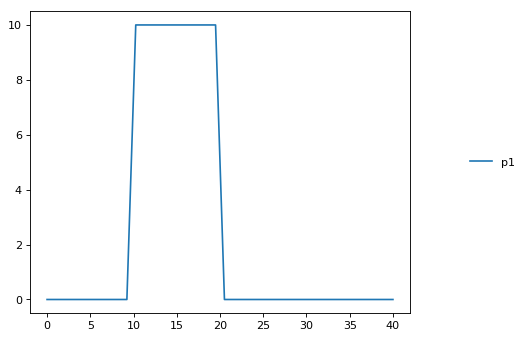

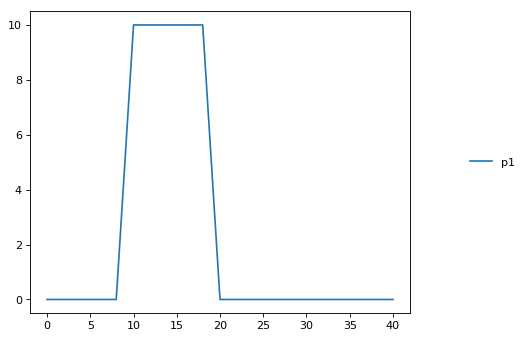

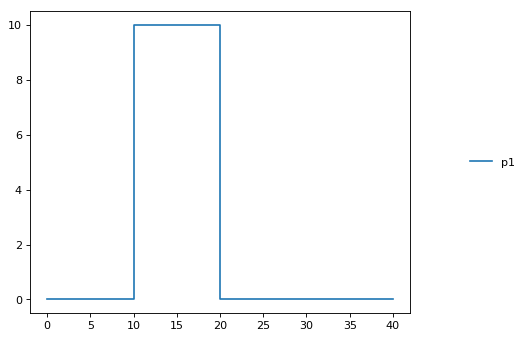

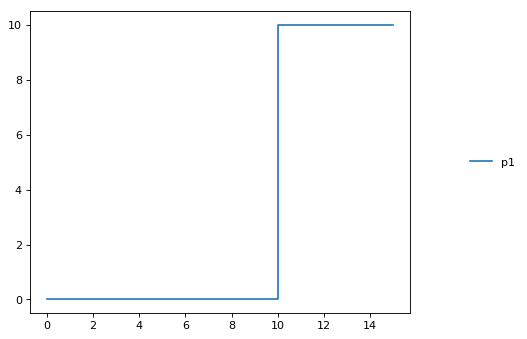

In [1]:
from __future__ import print_function
import tellurium as te
te.setDefaultPlottingEngine("matplotlib")
%matplotlib inline

print('-' * 80)
te.printVersionInfo()
print('-' * 80)

r = te.loada('''
model example
    p1 = 0;
    at time>=10: p1=10;
    at time>=20: p1=0;
end
''')

# convert current state of model back to Antimony / SBML
ant_str_before = r.getCurrentAntimony()
sbml_str_before = r.getCurrentSBML()
# r.exportToSBML('/path/to/test.xml')

# set selections
r.selections=['time', 'p1']
r.integrator.setValue("variable_step_size", False)
r.resetAll()
s1 = r.simulate(0, 40, 40)
r.plot()
# hitting the trigger point directly works
r.resetAll()
s2 = r.simulate(0, 40, 21)
r.plot()

# variable step size also does not work
r.integrator.setValue("variable_step_size", True)
r.resetAll()
s3 = r.simulate(0, 40)
r.plot()


# convert current state of model back to Antimony / SBML
ant_str_after = r.getCurrentAntimony()
sbml_str_after = r.getCurrentSBML()

import difflib
print("Comparing Antimony at time 0 & 40 (expect no differences)")
print('\n'.join(list(difflib.unified_diff(ant_str_before.splitlines(), ant_str_after.splitlines(), fromfile="before.sb", tofile="after.sb"))))

# now simulate up to time 15
r.resetAll()
s4 = r.simulate(0, 15)
r.plot()


# convert current state of model back to Antimony / SBML
ant_str_after2 = r.getCurrentAntimony()
sbml_str_after2 = r.getCurrentSBML()

print("Comparing Antimony at time 0 & 15")
print('\n'.join(list(difflib.unified_diff(ant_str_before.splitlines(), ant_str_after2.splitlines(), fromfile="before.sb", tofile="after.sb"))))

In [2]:
r.getSimulationData()

           time, p1
 [[           0,  0],
  [ 0.000514839,  0],
  [      5.1489,  0],
  [          10,  0],
  [          10, 10],
  [     10.0002, 10],
  [     12.2588, 10],
  [          15, 10]]